In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Sales_data_zone_wise.csv')
df.head()



,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [4]:
df.tail()


,Month,Zone - A,Zone - B,Zone - C,Zone - D
24,Month - 25,1256333,1622671,1521792,1695122
25,Month - 26,1422853,1715465,1853636,1520406
26,Month - 27,1384426,1983163,1611169,1289160
27,Month - 28,1616640,1547991,2128022,2178267
28,Month - 29,1310654,1660092,1947119,1854412


In [5]:
print('There are ',df.shape[0],'rows and ',df.shape[1],'columns in the dataset.')

There are  29 rows and  5 columns in the dataset.


In [6]:
df.isnull().sum()


Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


**1.Mean sales generated by each zone**

In [8]:
df.drop('Month',axis=1).mean().apply(lambda x: '%.5f' % x)

Zone - A    1540493.13793
Zone - B    1755559.58621
Zone - C    1772871.03448
Zone - D    1842926.75862
dtype: object

**2. Total sales generated by all the zones for each month.**

In [9]:
column_list = list(df)
column_list.remove("Month")
df1=df
df1["Total sales per month of all zones"]= df[column_list].sum(axis=1)
df1

,Month,Zone - A,Zone - B,Zone - C,Zone - D,Total sales per month of all zones
0,Month - 1,1483525,1748451,1523308,2267260,7022544
1,Month - 2,1238428,1707421,2212113,1994341,7152303
2,Month - 3,1860771,2091194,1282374,1241600,6475939
3,Month - 4,1871571,1759617,2290580,2252681,8174449
4,Month - 5,1244922,1606010,1818334,1326062,5995328
5,Month - 6,1534390,1573128,1751825,2292044,7151387
6,Month - 7,1820196,1992031,1786826,1688055,7287108
7,Month - 8,1625696,1665534,2161754,2363315,7816299
8,Month - 9,1652644,1873402,1755290,1422059,6703395
9,Month - 10,1852450,1913059,1754314,1608387,7128210


In [10]:
df1['Total sales per month of all zones'].max()

8174449

In [11]:
df1['Total sales per month of all zones'].min()


5925424


**3. Check whether all the zones generate the same amount of sales.**

In [12]:
from scipy.stats import f_oneway

#perform one-way ANOVA
f_oneway(df['Zone - A'], df['Zone - B'], df['Zone - C'],df['Zone - D'])

F_onewayResult(statistic=5.672056106843581, pvalue=0.0011827601694503335)

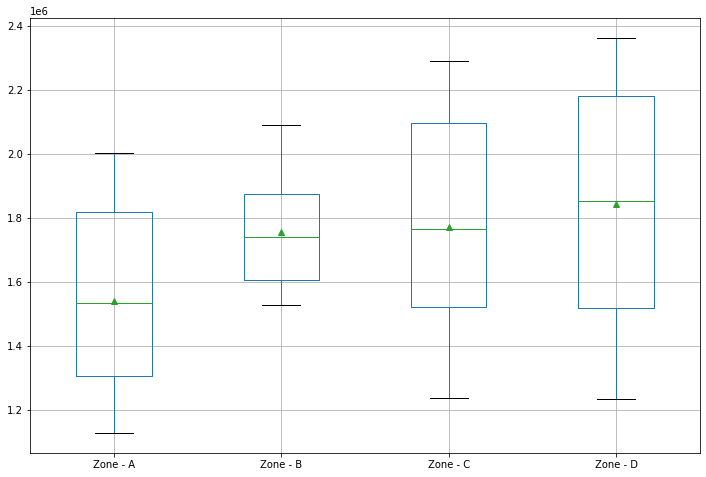

In [13]:
df.boxplot(column=['Zone - A','Zone - B','Zone - C','Zone - D'], figsize=(12, 8), showmeans=True)


**The sales Zone A sales is  different when compared to that of Zone B, Zone C and Zone D since the median of Zone A lies outside the boxes of Zone B, Zone C and Zone  D.**